Реализовать API, которое позволяет генерировать, преобразовывать и визуализировать последовательность плоских полигонов, представленных в виде картежа картежей (например: ((0,0), (0,1), (1,1), (1,0)) — представление для квадрата). Последовательности представлений полигонов представляют собой итераторы (далее: последовательности полигонов).

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import itertools as itt 
import functools as func

import matplotlib

from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon

In [2]:
def show_space():
    xmin, xmax, ymin, ymax = -10, 10, -10, 10
    ticks_frequency = 1

    fig, ax = plt.subplots(figsize=(10, 10))  
    
    ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')
    
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
    ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)

    x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
    y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
    ax.set_xticks(x_ticks[x_ticks != 0])
    ax.set_yticks(y_ticks[y_ticks != 0])

    ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

    arrow_fmt = dict(markersize=4, color='black', clip_on=False)
    ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
    ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)
    return fig, ax
    plt.show()
    


Реализовать функцию визуализации последовательности полигонов, представленной в виде итератора (например, можно использовать визуализацию с помощью библиотеки matplotlib

In [3]:
def pencil(ax, polygons, color = 'darkviolet',):
    patches = [Polygon(plate, edgecolor = color,fill = False, linewidth = 3, closed = True) for plate in polygons ]
    p = matplotlib.collections.PatchCollection(patches, match_original = True)
    ax.add_collection(p)


Реализовать функции, генерирующие бесконечную последовательность непересекающихся полигонов с различающимися координатами (например, «ленту», см. рис. 2):
прямоугольников (gen_rectangle);

треугольников (gen_triangle);

правильных шестиугольников (gen_hexagon).

с помощью данных функций используя функции из модуля itertools сгенерировать семь фигур, включающих как прямоугольники, так и треугольники и шестиугольники, визуализировать результат.

In [4]:
def gen_rectangle(width, height, gap, start, end):
    """Generates a series of rectangles along the x-axis.

    Yields coordinates for rectangles spaced at regular intervals, starting from
    the given position and continuing until reaching the end x coordinate.

    Args:
        width: The width of each rectangle (x-dimension).
        height: The height of each rectangle (y-dimension).
        gap: The horizontal spacing between rectangles.
        start: A tuple (x, y) representing the starting position of the first rectangle.
        end: The x-coordinate at which to stop generating rectangles.

    Yields:
        Tuples containing four (x, y) coordinate pairs representing the corners of each
        rectangle in order:
        (bottom_left, top_left, top_right, bottom_right)

    Example:
        >>> for rect in gen_rectangle(10, 5, 15, (0, 0), 50):
        ...     print(rect)
        ((0, 0), (0, 5), (10, 5), (10, 0))
        ((15, 0), (15, 5), (25, 5), (25, 0))
        ((30, 0), (30, 5), (40, 5), (40, 0))
        ((45, 0), (45, 5), (55, 5), (55, 0))
    """
    i = 0
    counter = start[0]
    while counter < end:
        yield (start[0] + i, start[1]),(start[0] + i, start[1] + height),(start[0] + width + i, start[1]+height),(start[0] + width + i, start[1])
        i += gap
        counter += gap

def gen_triangle(side, gap, start, end):
    """Generates a series of equilateral triangles along the x-axis.

    Yields coordinates for triangles spaced at regular intervals, starting from
    the given position and continuing until reaching the end x coordinate.

    Args:
        side: The length of each side of the equilateral triangle.
        gap: The horizontal spacing between triangles.
        start: A tuple (x, y) representing the starting position of the first triangle's base.
        end: The x-coordinate at which to stop generating triangles.

    Yields:
        Tuples containing three (x, y) coordinate pairs representing the vertices of each
        triangle in order: (left_base, apex, right_base)

    Example:
        >>> for tri in gen_triangle(10, 15, (0, 0), 50):
        ...     print(tri)
        ((0, 0), (5, 8.660), (10, 0))
        ((15, 0), (20, 8.660), (25, 0))
        ((30, 0), (35, 8.660), (40, 0))
        ((45, 0), (50, 8.660), (55, 0))
    """
    i = 0
    counter = start[0]
    while counter < end:
        yield (start[0] + i, start[1]),(start[0] + side/2 + i, start[1] + side * 3**0.5 / 2),(start[0] + side + i, start[1])
        i += gap
        counter += gap

def gen_hexagon(side, gap, start, end):
    """Generates a series of regular hexagons along the x-axis.

    Yields coordinates for hexagons spaced at regular intervals, starting from
    the given position and continuing until reaching the end coordinate.

    Args:
        side: The length of each side of the hexagon.
        gap: The horizontal spacing between hexagons.
        start: A tuple (x, y) representing the starting position of the first hexagon.
        end: The x-coordinate at which to stop generating hexagons.

    Yields:
        Tuples containing six (x, y) coordinate pairs representing the vertices of each
        hexagon in order, starting from the bottom-right vertex and proceeding clockwise.

    Example:
        >>> for hex in gen_hexagon(10, 20, (0, 0), 50):
        ...     print(hex)
        ((0, 0), (-5, 8.660), (0, 17.320), (10, 17.320), (15, 8.660), (10, 0))
        ((20, 0), (15, 8.660), (20, 17.320), (30, 17.320), (35, 8.660), (30, 0))
        ((40, 0), (35, 8.660), (40, 17.320), (50, 17.320), (55, 8.660), (50, 0))
    """
    i = 0
    counter = start[0]
    while counter < end:
        yield (start[0] + i, start[1]),(start[0] + i - side/2, start[1] + side* 3**0.5/2 ),(start[0] + i, start[1] + side*3**0.5), \
        (start[0] + side + i, start[1] + side*3**0.5), (start[0] + side * 1.5 + i, start[1] +  side*3**0.5/2), (start[0] + i + side, start[1])
        i += gap
        counter += gap


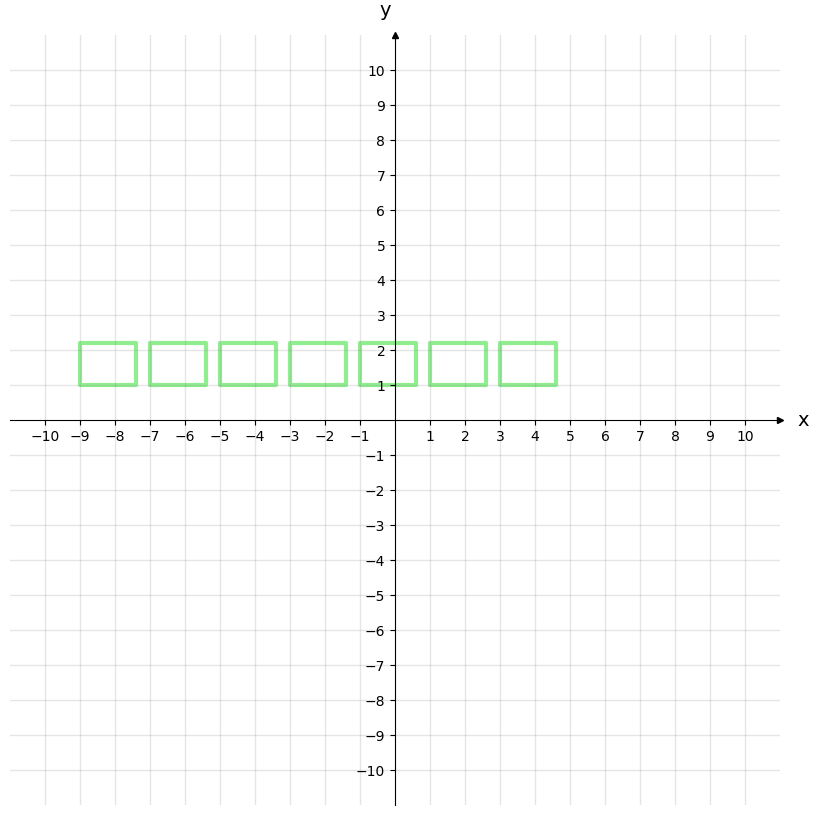

In [5]:
fig , ax = show_space()

pencil(ax, gen_rectangle(1.6, 1.2, 2, (-9, 1), 4), color = 'lightgreen')

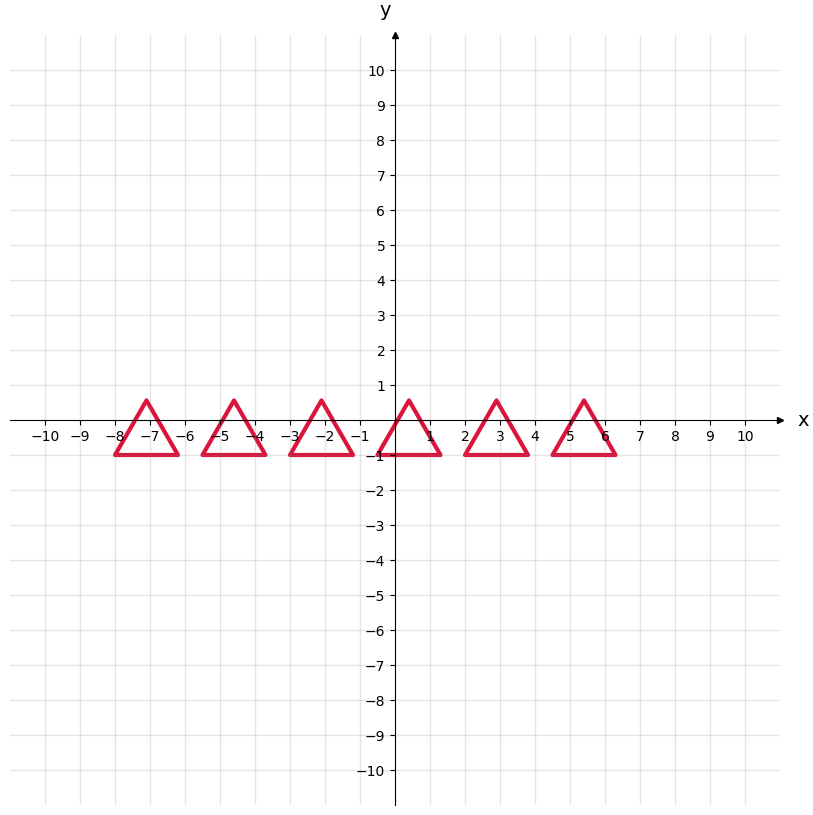

In [6]:
fig_1 , ax_1 = show_space()

pencil(ax_1, gen_triangle(1.8, 2.5, (-8, -1), 6), color = 'crimson')

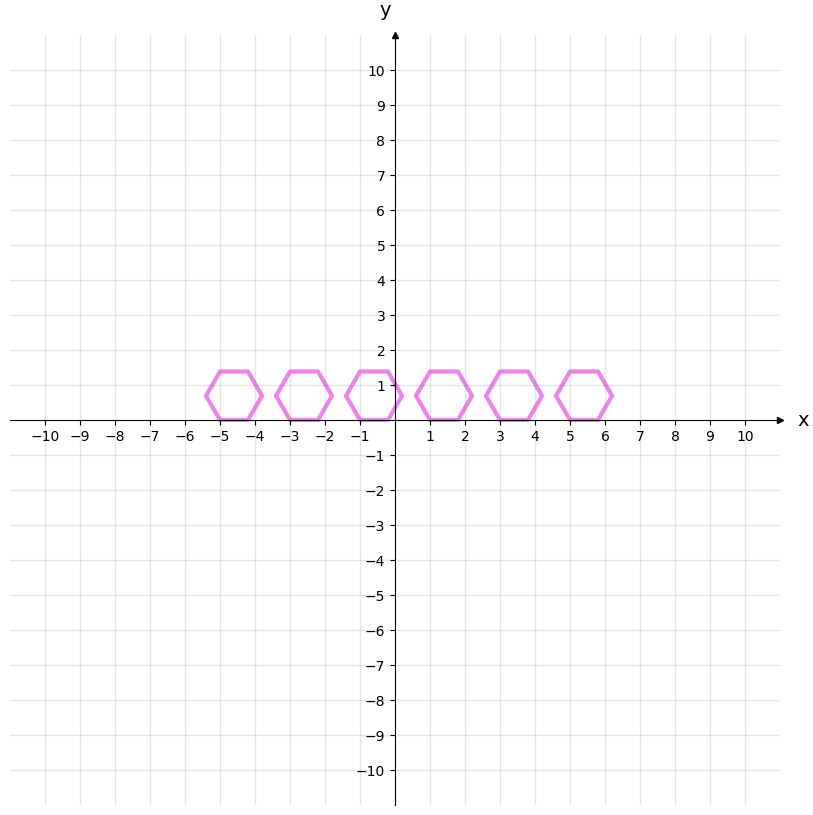

In [7]:
fig_2 , ax_2 = show_space()

pencil(ax_2, gen_hexagon(0.8, 2, (-5, 0), 6), color = 'violet')

Реализовать операции:
параллельный перенос (tr_translate);

поворот (tr_rotate);

симметрия (tr_symmetry);

гомотетия (tr_homothety);

которые можно применить к последовательности полигонов с помощью функции map

In [8]:
import math
def rotate(origin, point, angle):
    """Rotates a point around a given origin by a specified angle.

    Performs a 2D rotation transformation using math formulas.

    Args:
        origin: The (x, y) coordinates of the rotation center point.
        point: The (x, y) coordinates of the point to be rotated.
        angle: The rotation angle in degrees .

    Returns:
        A tuple (x, y) representing the new coordinates of the rotated point.

    Example:
        >>> rotate((0, 0), (1, 0), 90)
        (6.123233995736766e-17, 1.0)  # Approximately (0, 1)
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(math.radians(angle)) * (px - ox) - math.sin(math.radians(angle)) * (py - oy)
    qy = oy + math.sin(math.radians(angle)) * (px - ox) + math.cos(math.radians(angle)) * (py - oy)
    return qx, qy

def tr_rotate(origin, polygon, angle):
    """Rotates a  polygon around a specified point.

    Args:
        origin: The (x, y) center point for rotation.
        polygon: The input polygon as a tuple of (x, y) coordinate points.
        angle: The rotation angle in degrees.

    Returns:
        A new polygon (tuple of points) rotated around the specified point.

    Example:
        >>> square = ((0, 0), (1, 0), (1, 1), (0, 1))
        >>> tr_rotate((0.5, 0.5), square, 90)
        ((1.0, 0.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0))
    """
    return tuple((rotate(origin, dots, angle) for dots in polygon))



def tr_translate(move_cords, polygon):
    """Translates  a polygon by specified x and y values.

    Args:
        move_cords: A tuple (x, y) representing the translation offsets.
        polygon: The input polygon as a tuple of (x, y) coordinate points.

    Returns:
        A new polygon with all points shifted by (x, y).

    Example:
        >>> triangle = ((0, 0), (1, 0), (0.5, 1))
        >>> tr_translate((2, 3), triangle)
        ((2, 3), (3, 3), (2.5, 4))
    """
    dx, dy = move_cords
    return tuple((x + dx, y + dy) for x,y in polygon)

def tr_symmetry(move_cords, polygon):
    """Applies vertical symmetry transformation to a polygon.

    The symmetry is performed by rotating polygon  around the midpoint 
    of the polygon's horizontal pos, then translation.

    Args:
        polygon: The input polygon as a tuple of (x, y) coordinate points.
        coords: Translation offsets (dx, dy) to apply after symmetry.

    Returns:
        A new polygon that is the mirrored and translated version of the input.

    Example:
        >>> triangle = ((0, 0), (1, 0), (0.5, 1))
        >>> tr_symmetry(triangle, (0, 0))
        ((1.0, 0.0), (0.0, 0.0), (0.5, -1.0))
    """
    x = max([dots[0] for dots in polygon])+min([dots[0] for dots in polygon])
    y = min([dots[1] for dots in polygon])
    sim_point = (x/2, y) 
    polygon = tr_rotate(sim_point, polygon, 180) 
    return tr_translate(move_cords, polygon)

def tr_homothety(origin, polygon, k):
    """Applies a homothety (uniform scaling) transformation to a polygon.

    The scaling is centered around the specified point and uses the given
    scaling factor.

    Args:
        polygon: The input polygon as a tuple of (x, y) coordinate points.
        point: The (x, y) center point for the scaling transformation.
        k: The scaling factor (k > 1 enlarges, 0 < k < 1 shrinks).

    Returns:
        A new polygon scaled by factor k around the specified center point.

    Example:
        >>> triangle = ((0, 0), (1, 0), (0.5, 1))
        >>> tr_homothety(triangle, (0.5, 0.5), 2)
        ((-0.5, -0.5), (1.5, -0.5), (0.5, 1.5))
    """
    a, b = origin
    return tuple( (k*(x - a) + a, k*(y - b) + b) for x,y in polygon)

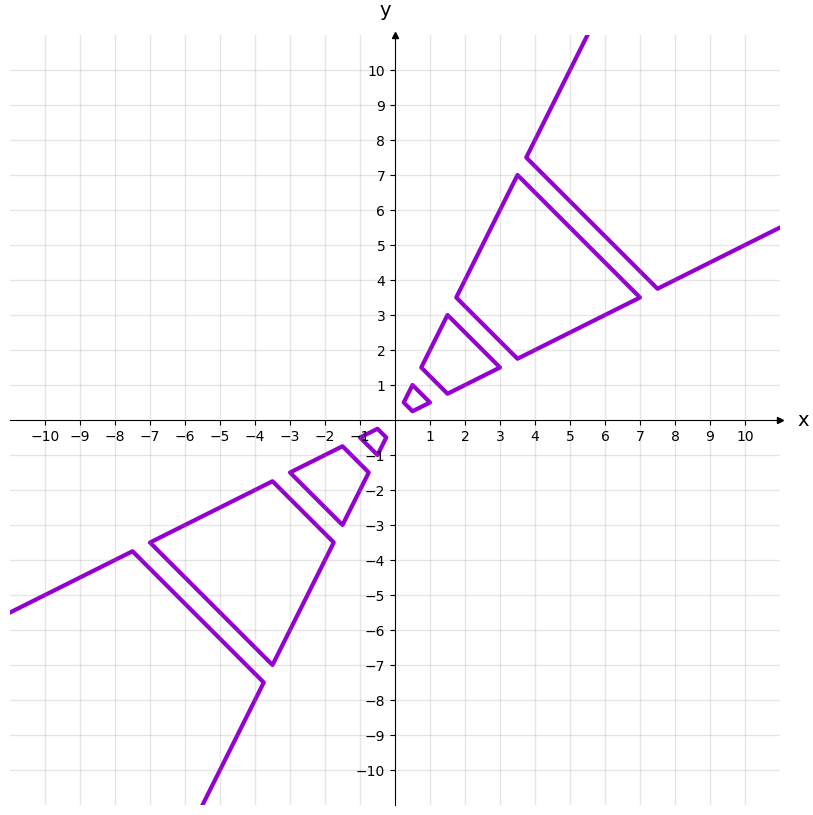

In [9]:
fig_4 , ax_4 = show_space()

pencil(ax_4, map(tr_homothety,[(0,0)]*8, [((0.5, 1), (1,2), (2,1), (1,0.5))]*8, [7.5, 3.5, 1.5, 0.5, -0.5, -1.5, -3.5, -7.5] ) )

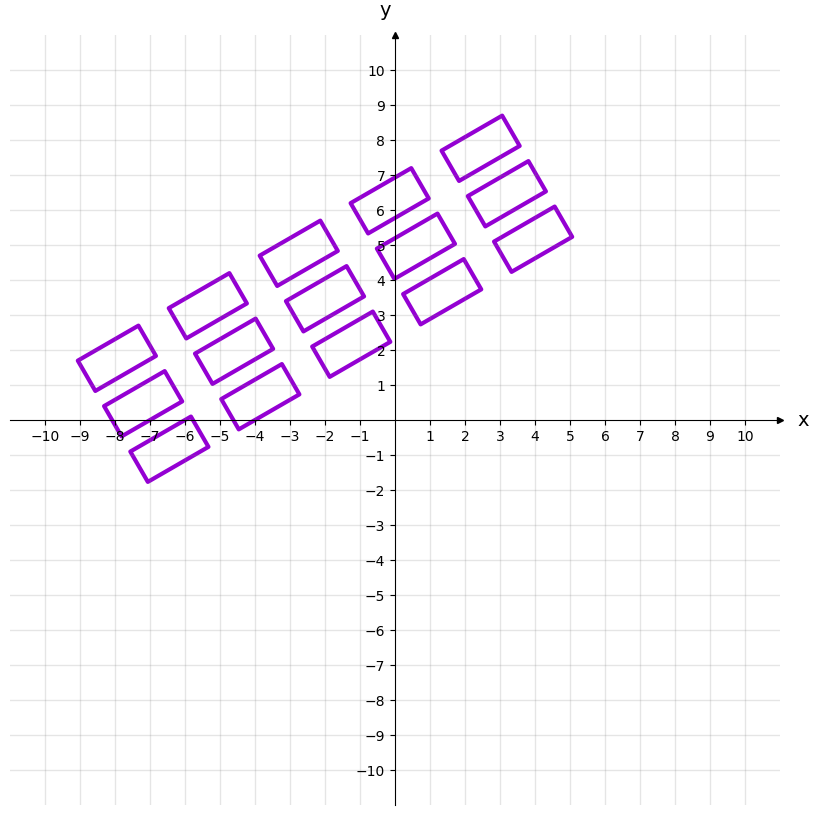

In [10]:
fig_6, ax_6  = show_space()
for i in range(3):
    pencil(ax_6, map(tr_rotate,[(0, 0)] * 5, gen_rectangle(2, 1, 3, (-7, 2 + i*1.5), 6), [30] * 5 ) )

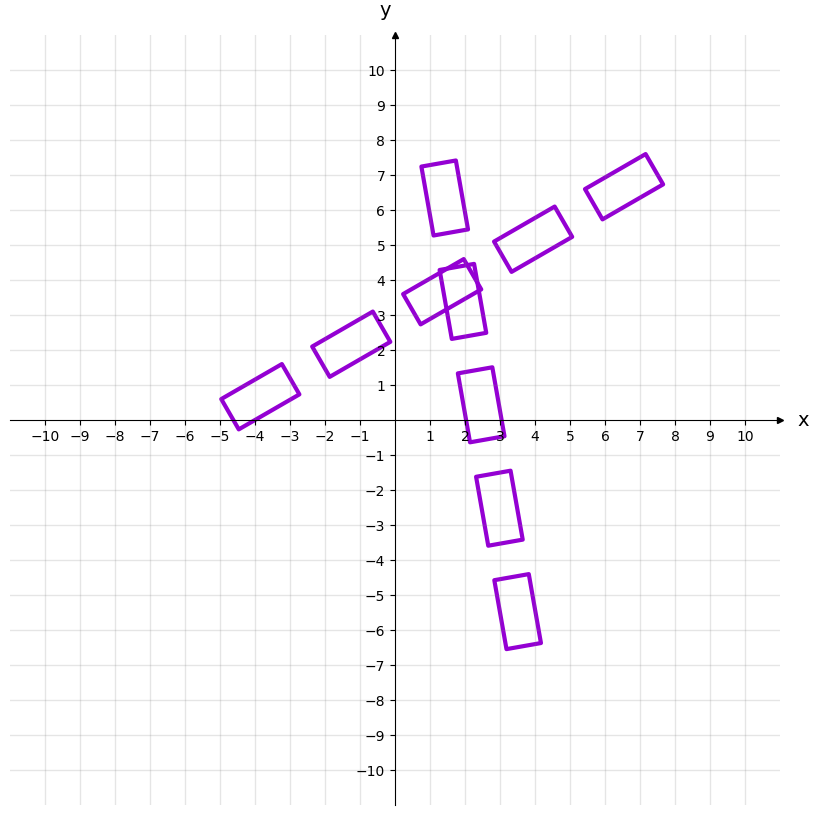

In [11]:
fig_7, ax_7  = show_space()

pencil(ax_7, map(tr_rotate,[(0, 0)] * 5, gen_rectangle(2, 1, 3, (-4, 2 ), 9), [30] * 5 ) )

pencil(ax_7, map(tr_rotate,[(0, 0)] * 5, gen_rectangle(2, 1, 3, (-7, 2 ), 9), [-80] * 5 ) )

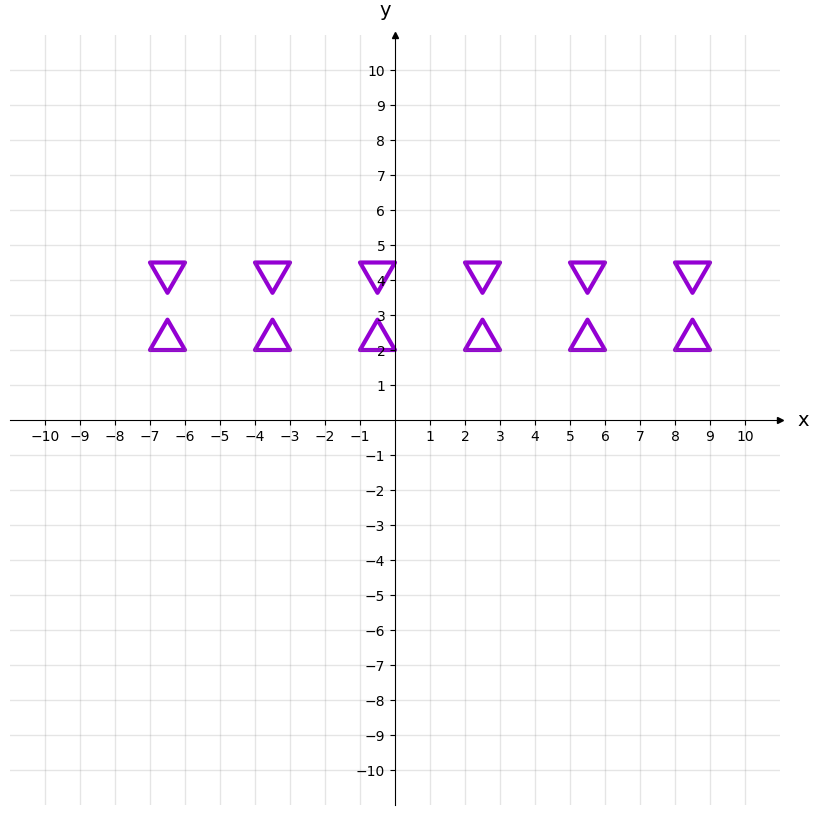

In [12]:
fig_8, ax_8  = show_space()

pencil(ax_8, map(tr_symmetry,[(0,2.5)] * 6, gen_triangle(1, 3, (-7, 2 ), 9)) )
pencil(ax_8, gen_triangle(1, 3, (-7, 2 ), 9))

Реализовать операции:
фильтрации фигур, являющихся выпуклыми многоугольниками (flt_convex_polygon);

фильтрации фигур, имеющих хотя бы один угол, совпадающий с заданной точкой (flt_angle_point);

фильтрации фигур, имеющих площадь меньше заданной (flt_square);

фильтрации фигур, имеющих кратчайшую сторону меньше заданного значения (flt_short_side);

фильтрации выпуклых многоугольников, включающих заданную точку (внутри многоугольника) (flt_point_inside);

фильтрации выпуклых многоугольников, включающих любой из углов заданного многоугольника (flt_polygon_angles_inside);

которые можно применить к последовательности полигонов с помощью функции filter.

обязательная часть: 2 пункта
4 пункта — сложность 1
6 пунктов — сложность 2

In [13]:
def CrossProduct(A):
    
    # Stores coefficient of X
    # direction of vector A[1]A[0]
    X1 = (A[1][0] - A[0][0])

    # Stores coefficient of Y
    # direction of vector A[1]A[0]
    Y1 = (A[1][1] - A[0][1])

    # Stores coefficient of X
    # direction of vector A[2]A[0]
    X2 = (A[2][0] - A[0][0])

    # Stores coefficient of Y
    # direction of vector A[2]A[0]
    Y2 = (A[2][1] - A[0][1])

    # Return cross product
    return (X1 * Y2 - Y1 * X2)


def isConvex(points): 
    # Stores count of edges in polygon
    N = len(points)
    # Stores direction of cross product of previous traversed edges
    prev = 0
    # Stores direction of cross product of current traversed edges
    curr = 0
    # Traverse the array
    for i in range(N): 
        # Stores three adjacent edges of the polygon
        temp = [points[i], points[(i + 1) % N], 
                           points[(i + 2) % N]]
        # Update curr
        curr = CrossProduct(temp)

        # If curr is not equal to 0
        if (curr != 0):
            # If direction of cross product of all adjacent edges are not same
            if (curr * prev < 0):
                return False
            else:
                # Update curr
                prev = curr
    return True






In [14]:
def CrossProduct(A):
    """Calculates the cross product of two vectors formed by three points.

    Given three points A[0], A[1], and A[2], this computes the cross product of:
    - Vector from A[0] to A[1]
    - Vector from A[0] to A[2]

    Args:
        A: A list of exactly three (x, y) coordinate points representing:
           [base_point, vector1_end, vector2_end]

    Returns:
        The magnitude of the cross product. The sign indicates the turning direction:
        - Positive: Counter-clockwise turn
        - Negative: Clockwise turn
        - Zero: Collinear points

    Example:
        >>> CrossProduct([(0, 0), (1, 0), (0, 1)])
        1.0  # Counter-clockwise turn
    """
    # Stores coefficient of X
    # direction of vector A[1]A[0]
    X1 = (A[1][0] - A[0][0])

    # Stores coefficient of Y
    # direction of vector A[1]A[0]
    Y1 = (A[1][1] - A[0][1])

    # Stores coefficient of X
    # direction of vector A[2]A[0]
    X2 = (A[2][0] - A[0][0])

    # Stores coefficient of Y
    # direction of vector A[2]A[0]
    Y2 = (A[2][1] - A[0][1])

    # Return cross product
    return (X1 * Y2 - Y1 * X2)


def isConvex(points): 
    """Determines if a polygon is convex by checking turning directions.

    A polygon is convex if all interior angles are ≤ 180 degrees and there are no
    "indentations". This is detected by verifying that all turns between consecutive
    edges have the same direction (all cross products have consistent signs).

    Args:
        points: List of (x, y) coordinate points representing the polygon vertices
                in order (either clockwise or counter-clockwise).

    Returns:
        True if the polygon is convex, False if concave or degenerate.

    Raises:
        ValueError: If fewer than 3 points are provided (not a valid polygon).

    Example:
        >>> isConvex([(0, 0), (0, 1), (1, 1), (1, 0)])
        True  # Square is convex
        >>> isConvex([(0, 0), (2, 1), (1, 1), (1, 2), (0, 1)])
        False  # Star shape is concave
    """
    # Stores count of edges in polygon
    N = len(points)
    # Stores direction of cross product of previous traversed edges
    prev = 0
    # Stores direction of cross product of current traversed edges
    curr = 0
    # Traverse the array
    for i in range(N): 
        # Stores three adjacent edges of the polygon
        temp = [points[i], points[(i + 1) % N], 
                           points[(i + 2) % N]]
        # Update curr
        curr = CrossProduct(temp)

        # If curr is not equal to 0
        if (curr != 0):
            # If direction of cross product of all adjacent edges are not same
            if (curr * prev < 0):
                return False
            else:
                # Update curr
                prev = curr
    return True


def flt_angle_point(polygon, point):
    """Checks if a given point matches any vertex of the polygon (within rounding tolerance).

    Args:
        polygon: The input polygon as a sequence of (x, y) coordinate points.
        point: The (x, y) coordinates to check against polygon vertices.

    Returns:
        True if the point matches any polygon vertex (within 5 decimal places), False otherwise.

    Example:
        >>> triangle = ((0.123456, 0), (1, 0), (0.5, 1))
        >>> flt_angle_point(triangle, (0.12346, 0))
        True
    """
    
    point = tuple([round(point[0], 5), round(point[1], 5)])
    
    return bool(any( [ point == (round(coords[0], 5), round(coords[1], 5) ) for coords  in polygon]))
    

def flt_square(polygon, square):
    """Determines if a polygon's area exceeds a given threshold.

    Supports triangles, quadrilaterals, and hexagons with specialized area calculations.

    Args:
        polygon: The input polygon as a sequence of (x, y) coordinate points.
        square: The area threshold to compare against.

    Returns:
        True if the polygon's area > threshold, False otherwise.

    Raises:
        ValueError: If polygon has unsupported number of sides (not 3, 4, or 6).

    Example:
        >>> triangle = ((0, 0), (1, 0), (0.5, 1))
        >>> flt_square(triangle, 0.4)
        True
    """
    if len(polygon) == 4:
        a = ( abs(polygon[1][0] - polygon[0][0])**2 + abs(polygon[1][1] - polygon[0][1])**2 )**0.5
        b = ( abs(polygon[2][1] - polygon[1][1])**2 + abs(polygon[2][0] - polygon[1][0])**2 )**0.5
        pres_square = round(a*b, 5)
        
    elif len(polygon) == 3:
        a = ( abs(polygon[2][1] - polygon[0][1])**2 + abs(polygon[2][0] - polygon[0][0])**2 )**0.5
        pres_square = round(a**2 * 3**0.5 /4, 5)
        
    elif len(polygon) == 6:
        a = ( abs(polygon[2][1] - polygon[0][1])**2 + abs(polygon[2][0] - polygon[0][0])**2 )**0.5
        pres_square = round( (3*3**0.5*a**2)/2, 5)
        
    return pres_square > square

def flt_short_side(polygon, condition):
    """Checks if all polygon sides meet a minimum length requirement.

    Args:
        polygon: The input polygon as a sequence of (x, y) coordinate points.
        condition: The minimum allowed side length.

    Returns:
        True if all sides are ≥ condition length, False otherwise.

    Example:
        >>> square = ((0, 0), (2, 0), (2, 2), (0, 2))
        >>> flt_short_side(square, 1.5)
        True
    """
    sides = []
    for i in range(len(polygon)):
        sides.append(round( ( abs(polygon[i][0] - polygon[i-1][0])**2 + abs(polygon[i][1] - polygon[i-1][1])**2 )**0.5, 5))
   
    small_side = min(sides)
    
    return small_side >= condition


def flt_point_inside(x,y,polygon):
    """Determines if a point is inside a polygon using ray-casting algorithm.

    Args:
        x: The x-coordinate of the point to test.
        y: The y-coordinate of the point to test.
        polygon: The input polygon as a sequence of (x, y) coordinate points.

    Returns:
        True if the point is inside the polygon, False otherwise.

    Example:
        >>> square = ((0, 0), (2, 0), (2, 2), (0, 2))
        >>> flt_point_inside(1, 1, square)
        True
    """
    n = len(polygon)
    inside = False
    p2x = 0.0
    p2y = 0.0
    xints = 0.0
    p1x,p1y = polygon[0]
    for i in range(n+1):
        p2x,p2y = polygon[i % n]
        if y > min(p1y,p2y):
            if y <= max(p1y,p2y):
                if x <= max(p1x,p2x):
                    if p1y != p2y:
                        xints = (y-p1y)*(p2x-p1x)/(p2y-p1y)+p1x
                    if p1x == p2x or x <= xints:
                        inside = not inside
        p1x,p1y = p2x,p2y

    return inside


def flt_polygon_angles_inside(polygon, given_polygon):
    """Checks if any vertex of one polygon is inside another polygon.

    Args:
        polygon: The containing polygon to test against.
        given_polygon: The polygon whose vertices will be checked.

    Returns:
        True if any vertex of given_polygon is inside polygon, False otherwise.

    Example:
        >>> big_square = ((0, 0), (3, 0), (3, 3), (0, 3))
        >>> small_square = ((1, 1), (2, 1), (2, 2), (1, 2))
        >>> flt_polygon_angles_inside(big_square, small_square)
        True
    """
    return any(flt_point_inside(x,y,polygon) for x,y in given_polygon)

С помощью данных функций реализовать и визуализировать:
фильтрацию фигур, созданных в рамках пункта 4.4; подобрать параметры так, чтобы на выходе было получено шесть фигур;

используя функции генерации из п. 2 и операции из п. 3, создать не менее 15 фигур, которые имеют различный масштаб, и выбрать из них (подбором параметра фильтрации) не более четырех фигур, имеющих кратчайшую сторону меньше заданного значения;

используя функции генерации из п. 2 и операции из п. 3, создать не менее 15 фигур имеющих множество пересечений и обеспечить фильтрацию пересекающихся фигур.

обязательная часть: 1 пункт
3 пункта — сложность 1

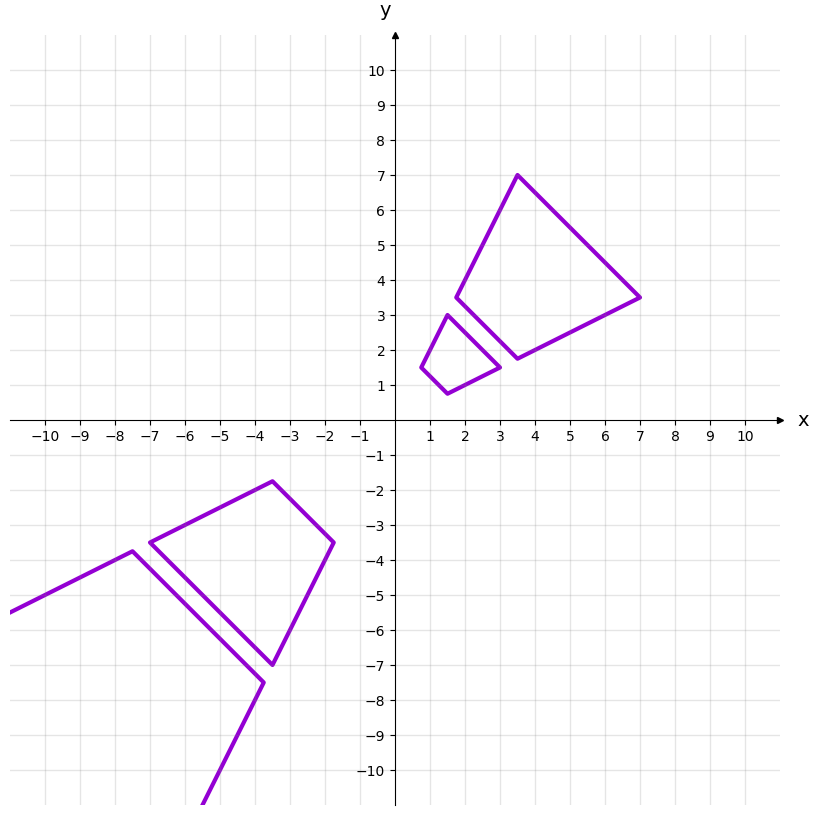

In [15]:
fig_4 , ax_4 = show_space()

polygons = list(map(tr_homothety, [(0,0)]*8, [((0.5, 1), (1,2), (2,1), (1,0.5))]*8 , [7.5, 3.5, 1.5, 0.5, -0.5, -1.5, -3.5, -7.5] ))  

dots = list( zip([4, 3, 2, 0, -1, -5, -5, -10], [10, 4, 2, 0, -1, -5, -5, -10]) )
polygons = [polygons[i] for i in range(8) if flt_point_inside(dots[i][0], dots[i][1], polygons[i]) ]
pencil(ax_4, polygons )



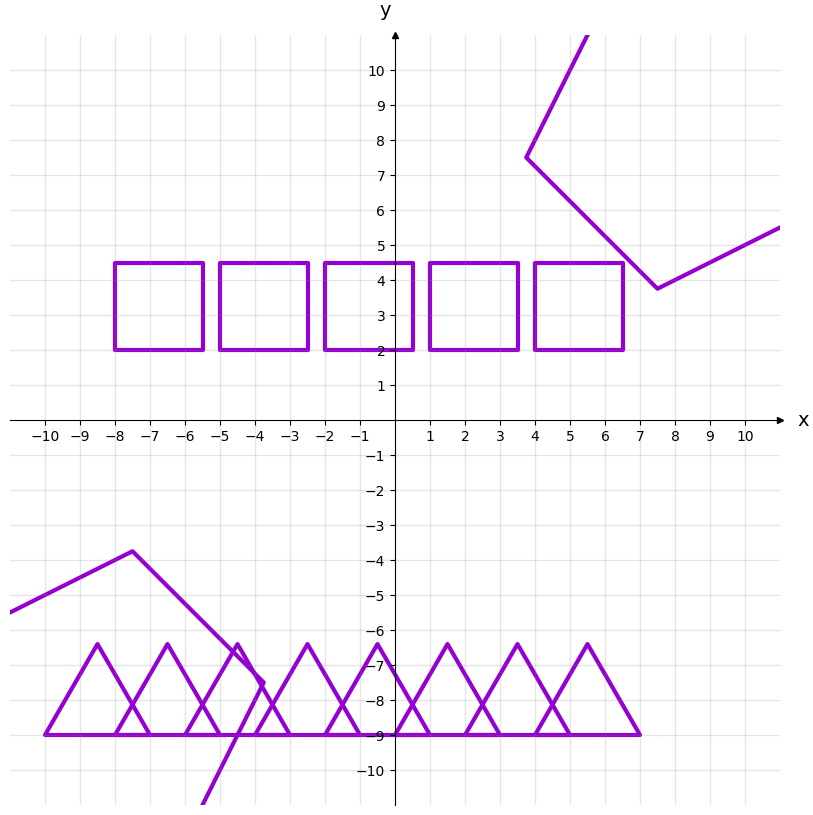

In [16]:
fig_4 , ax_4 = show_space()

polygons_1 = map(tr_homothety, [(0,0)]*8,  [((0.5, 1), (1,2), (2,1), (1,0.5))]*8 , [7.5, 3.5, 1.5, 0.5, -0.5, -1.5, -3.5, -7.5] )
polygons_2 = map(tr_translate, [(-2, -3)]*8 ,gen_triangle(3, 2,(-8, -6), 7) )
polygons_3 = list(gen_rectangle(2.5, 2.5, 3, (-8, 2), 7) )
polygons = filter(lambda polygon : flt_short_side(polygon, 2.5) ,list(polygons_1) + list(polygons_2) + polygons_3)
pencil(ax_4, polygons)

NameError: name 'flt_convex_polygon' is not defined

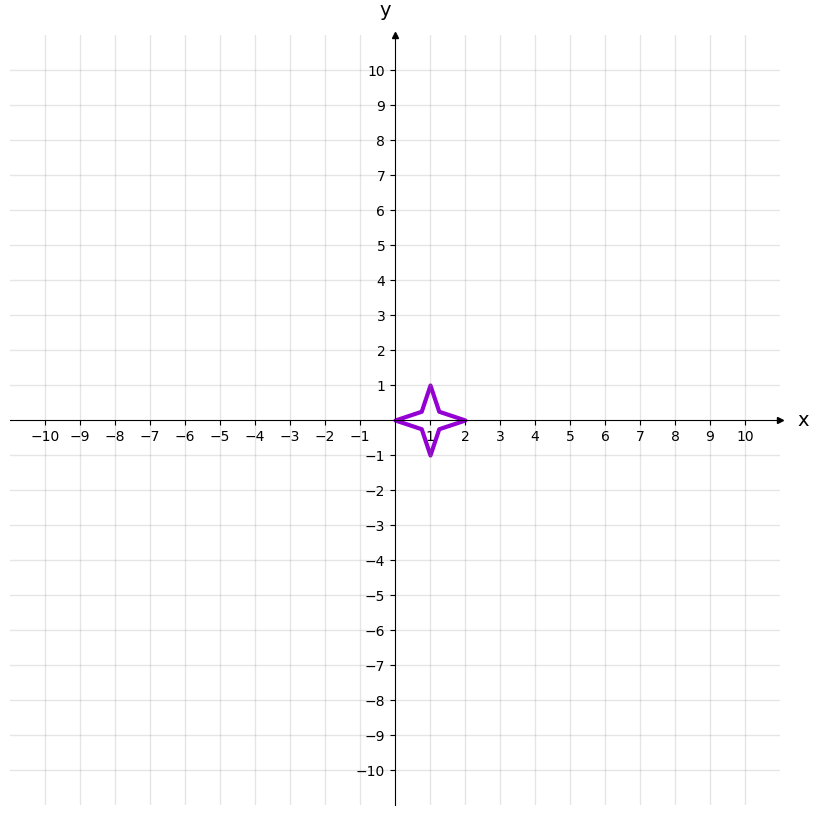

In [17]:
fig_4 , ax_4 = show_space()

polygons = list(map(tr_homothety, [(0,0)]*8, [((0.5, 1), (1,2), (2,1), (1,0.5))]*8 , [7.5, 3.5, 1.5, 0.5, -0.5, -1.5, -3.5, -7.5] )) 
#+ \list(gen_triangle()) + list(gen_hexagon())

star = [((0, 0), (0.75, 0.25), (1, 1), (1.25, 0.25), (2, 0), (1.25, -0.25), (1, -1), (0.75, -0.25))]
pencil(ax_4, star) 
print(flt_convex_polygon(*star))

dots = list( zip([4, 3, 2, 0, -1, -5, -5, -10], [10, 4, 2, 0, -1, -5, -5, -10]) )
polygons = [polygons[i] for i in range(8) if flt_point_inside(dots[i][0], dots[i][1], polygons[i]) ]
pencil(ax_4, polygons )



Реализовать функции и продемонстрировать их корректность:
поиск угла, самого близкого к началу координат (agr_origin_nearest);

поиск самого длинной стороны многоугольника (agr_max_side);

поиск самой маленькой площади многоугольника (agr_min_area);

расчет суммарного периметра (agr_perimeter);

расчет суммарной площади (agr_area);

которые можно применить к последовательности полигонов с помощью функции functools.reduce.

3 пункта — сложность 1
5 пунктов — сложность 2

In [69]:
def agr_origin_nearest(point, polygon):
    """Finds the point (from a given point and polygon vertices) closest to the origin.

    Args:
        point: An (x, y) coordinate point to consider.
        polygon: A sequence of (x, y) coordinate points representing a polygon.

    Returns:
        The (x, y) point from either the input point or polygon vertices that is
        closest to the origin (0, 0), based on Euclidean distance.

    Example:
        >>> agr_origin_nearest((1, 1), [(3, 4), (0.5, 0.5), (2, 2)])
        (0.5, 0.5)  # Closest to origin
    """
    
    origin_len = round( (point[0]**2+point[1]**2)**0.5 , 5)
    temp_len = 0
    maxim = {origin_len:point}
    for dots in polygon:
        temp_len = round( (dots[0]**2+dots[1]**2)**0.5 , 5)
        maxim[temp_len] = dots
    ans = min(maxim.items(), key = lambda x : x[0])
    
    return ans[1]


def agr_max_side(max_side, polygon_2):
    """Calculates the maximum side length between current max and polygon sides.

    Args:
        max_side: Current maximum side length to compare against.
        polygon: A sequence of (x, y) coordinate points representing a polygon.

    Returns:
        The larger value between the input max_side and the longest side
        of the given polygon.

    Example:
        >>> agr_max_side(5.0, [(0, 0), (0, 3), (4, 3), (4, 0)])
        5.0  # Existing max is larger than polygon's longest side (4.0)
    """
    sides = []
    for i in range(len(polygon)):
        sides.append(round( ( abs(polygon[i][0] - polygon[i-1][0])**2 + abs(polygon[i][1] - polygon[i-1][1])**2 )**0.5))
   
    max_side = max(max_side + max(sides) ) 
    
    return max_side


def agr_min_area(area, polygon):
    """Finds the smaller area between current minimum and given polygon's area.

    Supports triangles, quadrilaterals, and hexagons with specialized area calculations.

    Args:
        area: Current minimum area to compare against.
        polygon: A sequence of (x, y) points representing the polygon.

    Returns:
        The smaller value between the input area and the calculated area
        of the given polygon.

    Raises:
        ValueError: If polygon has unsupported number of sides (not 3, 4, or 6).

    Example:
        >>> agr_min_area(10.0, [(0, 0), (1, 0), (0.5, 1)])  # Triangle
        0.43301  # Area of this triangle is smaller than 10.0
    """
    if len(polygon) == 4:
        a = ( abs(polygon[1][0] - polygon[0][0])**2 + abs(polygon[1][1] - polygon[0][1])**2 )**0.5
        b = ( abs(polygon[2][1] - polygon[1][1])**2 + abs(polygon[2][0] - polygon[1][0])**2 )**0.5
        pres_square = round(a*b, 5)
        
    elif len(polygon) == 3:
        a = ( abs(polygon[2][1] - polygon[0][1])**2 + abs(polygon[2][0] - polygon[0][0])**2 )**0.5
        pres_square = round(a**2 * 3**0.5 /4, 5)
        
    elif len(polygon) == 6:
        a = ( abs(polygon[2][1] - polygon[0][1])**2 + abs(polygon[2][0] - polygon[0][0])**2 )**0.5
        pres_square = round( (3*3**0.5*a**2)/2, 5)

    return min(area, pres_square)

def agr_perimeter(perimetr, polygon):
    """Accumulates the perimeter of a polygon with existing perimeter value.

    Args:
        perimeter: Current perimeter value to add to.
        polygon: A sequence of (x, y) coordinate points representing a polygon.

    Returns:
        The sum of the input perimeter and the perimeter of the given polygon.

    Example:
        >>> agr_perimeter(10.0, [(0, 0), (1, 0), (1, 1), (0, 1)])
        14.0  # 10.0 + 4.0 (square perimeter)
    """
    sides = []
    for i in range(len(polygon)):
        sides.append(round( ( abs(polygon[i][0] - polygon[i-1][0])**2 + abs(polygon[i][1] - polygon[i-1][1])**2 )**0.5))

    return perimetr + sum(sides)

def agr_area(area, polygon):
    """Accumulates the area of a polygon with existing area value.

    Supports triangles, quadrilaterals, and hexagons with specialized area calculations.

    Args:
        area: Current area value to add to.
        polygon: A sequence of (x, y) coordinate points representing a polygon.

    Returns:
        The sum of the input area and the calculated area of the given polygon.

    Raises:
        ValueError: If polygon has unsupported number of sides (not 3, 4, or 6).

    Example:
        >>> agr_area(5.0, [(0, 0), (1, 0), (0.5, 1)])  # Triangle
        5.43301  # 5.0 + triangle area"""
    if len(polygon) == 4:
        a = ( abs(polygon[1][0] - polygon[0][0])**2 + abs(polygon[1][1] - polygon[0][1])**2 )**0.5
        b = ( abs(polygon[2][1] - polygon[1][1])**2 + abs(polygon[2][0] - polygon[1][0])**2 )**0.5
        pres_square = round(a*b, 5)
        
    elif len(polygon) == 3:
        a = ( abs(polygon[2][1] - polygon[0][1])**2 + abs(polygon[2][0] - polygon[0][0])**2 )**0.5
        pres_square = round(a**2 * 3**0.5 /4, 5)
        
    elif len(polygon) == 6:
        a = ( abs(polygon[2][1] - polygon[0][1])**2 + abs(polygon[2][0] - polygon[0][0])**2 )**0.5
        pres_square = round( (3*3**0.5*a**2)/2, 5)

    return area + pres_square
   

In [70]:
from functools import reduce 
reduce(lambda x,y : x+y, range(5), 10)

20

(0, 2)

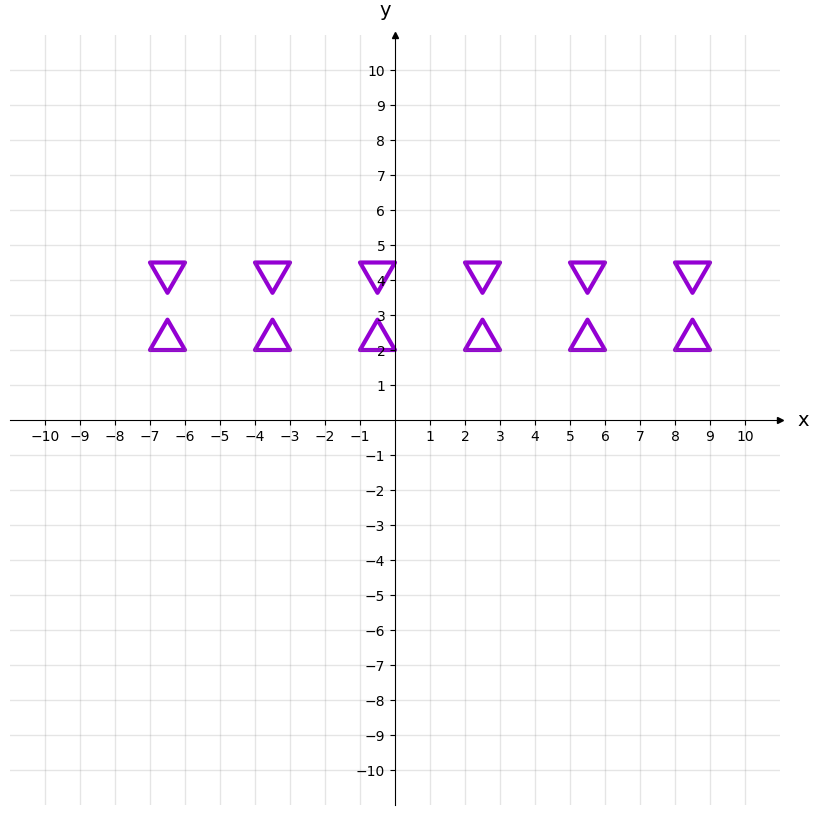

In [71]:
fig_8, ax_8  = show_space()

pencil(ax_8, map(tr_symmetry,[(0,2.5)] * 6, gen_triangle(1, 3, (-7, 2 ), 9)) )
pencil(ax_8, gen_triangle(1, 3, (-7, 2 ), 9))

list(reduce(agr_origin_nearest, list(gen_triangle(1, 3, (-7, 2 ), 9)),(10,10) ))

agr_origin_nearest((10,10),list(gen_triangle(1, 3, (-7, 2 ), 9))[2])

In [ ]:
fig_8, ax_8  = show_space()

pencil(ax_8, map(tr_symmetry,[(0,2.5)] * 6, gen_triangle(1, 3, (-7, 2 ), 9)) )
pencil(ax_8, gen_triangle(1, 3, (-7, 2 ), 9))

list(reduce(agr_origin_nearest, list(gen_triangle(1, 3, (-7, 2 ), 9)),(10,10) ))

agr_origin_nearest((10,10),list(gen_triangle(1, 3, (-7, 2 ), 9))[2])

склейки полигонов в одну последовательность полигонов из нескольких последовательностей полигонов zip_polygons(iterator1, iterator2, [iterator3, ...]). Пример:

zip_polygons([((1, 1), (2, 2), (3, 1)), ((11, 11), (12, 12), (13, 11))], [((1, -1), (2, -2), (3, -1)), ((11, -11), (12, -12), (13, -11))]) →

[((1, 1), (2, 2), (3, 1), (1, -1), (2, -2), (3, -1)), ((11, 11), (12, 12), (13, 11), (11, -11), (12, -12), (13, -11))].